# AlexNet

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


## 1.1. Install Pytorch and torchvision

In [2]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## 1.2. Import

In [3]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [4]:
batch_size = 128

In [5]:
train_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(256), transforms.RandomCrop(224), transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

test_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop(256), transforms.TenCrop(224),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
    transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], 
                                                                       std=[0.1950, 0.1922, 0.1940])(crop) for crop in crops]))
    ])

train_dataset = torchvision.datasets.CIFAR10('../Dataset/cifar10/', train=True, download=True, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

test_dataset = torchvision.datasets.CIFAR10('../Dataset/cifar10/', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


# 3. Train Model

In [6]:
num_classes = 10

gpu_id = 4
print_freq = 130
epoch_print = 20

save = True
epochs = 401

lr = 0.01
momentum = 0.9
weight_decay = 0.0005

In [7]:
AlexNet = train.AlexNet(num_classes=num_classes, gpu_id=gpu_id, print_freq=print_freq, epoch_print=epoch_print)

In [8]:
AlexNet.train(train_loader, test_loader, save, epochs, lr, momentum, weight_decay)

Epoch 1 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 130 - Train Loss : 2.3027, Test Loss : 2.3026, Train Acc : 9.3750, Test Acc : 10.0000
Saved Best Model
Iteration : 260 - Train Loss : 2.3026, Test Loss : 2.3026, Train Acc : 9.3750, Test Acc : 10.0000

*********************************** Best Acc Updated ***********************************
Iteration : 390 - Train Loss : 2.3026, Test Loss : 2.3026, Train Acc : 9.3750, Test Acc : 10.8200
Saved Best Model
Epoch 21 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 130 - Train Loss : 1.9589, Test Loss : 2.0261, Train Acc : 50.7812, Test Acc : 44.3100
Saved Best Model

*********************************** Best Acc Updated ***********************************
Iteration : 260 - Train Loss : 2.0171, Test Loss : 1.9965, Train Acc : 45.3125, Test Acc : 47.8000
Saved Best Model
Iteration : 390 - Train Loss : 2.0066, Te

Saved Best Model
Iteration : 390 - Train Loss : 1.5294, Test Loss : 1.6079, Train Acc : 94.5312, Test Acc : 88.3900
Epoch 381 Started...
Iteration : 130 - Train Loss : 1.5125, Test Loss : 1.6014, Train Acc : 94.5312, Test Acc : 89.1100
Iteration : 260 - Train Loss : 1.4901, Test Loss : 1.6041, Train Acc : 98.4375, Test Acc : 88.7200
Iteration : 390 - Train Loss : 1.5011, Test Loss : 1.6036, Train Acc : 96.0938, Test Acc : 88.6300
Epoch 401 Started...
Iteration : 130 - Train Loss : 1.4931, Test Loss : 1.6026, Train Acc : 96.8750, Test Acc : 89.0600
Iteration : 260 - Train Loss : 1.4976, Test Loss : 1.6032, Train Acc : 96.8750, Test Acc : 89.0200
Iteration : 390 - Train Loss : 1.5071, Test Loss : 1.6067, Train Acc : 96.0938, Test Acc : 88.6100


Text(0, 0.5, 'Accuracy')

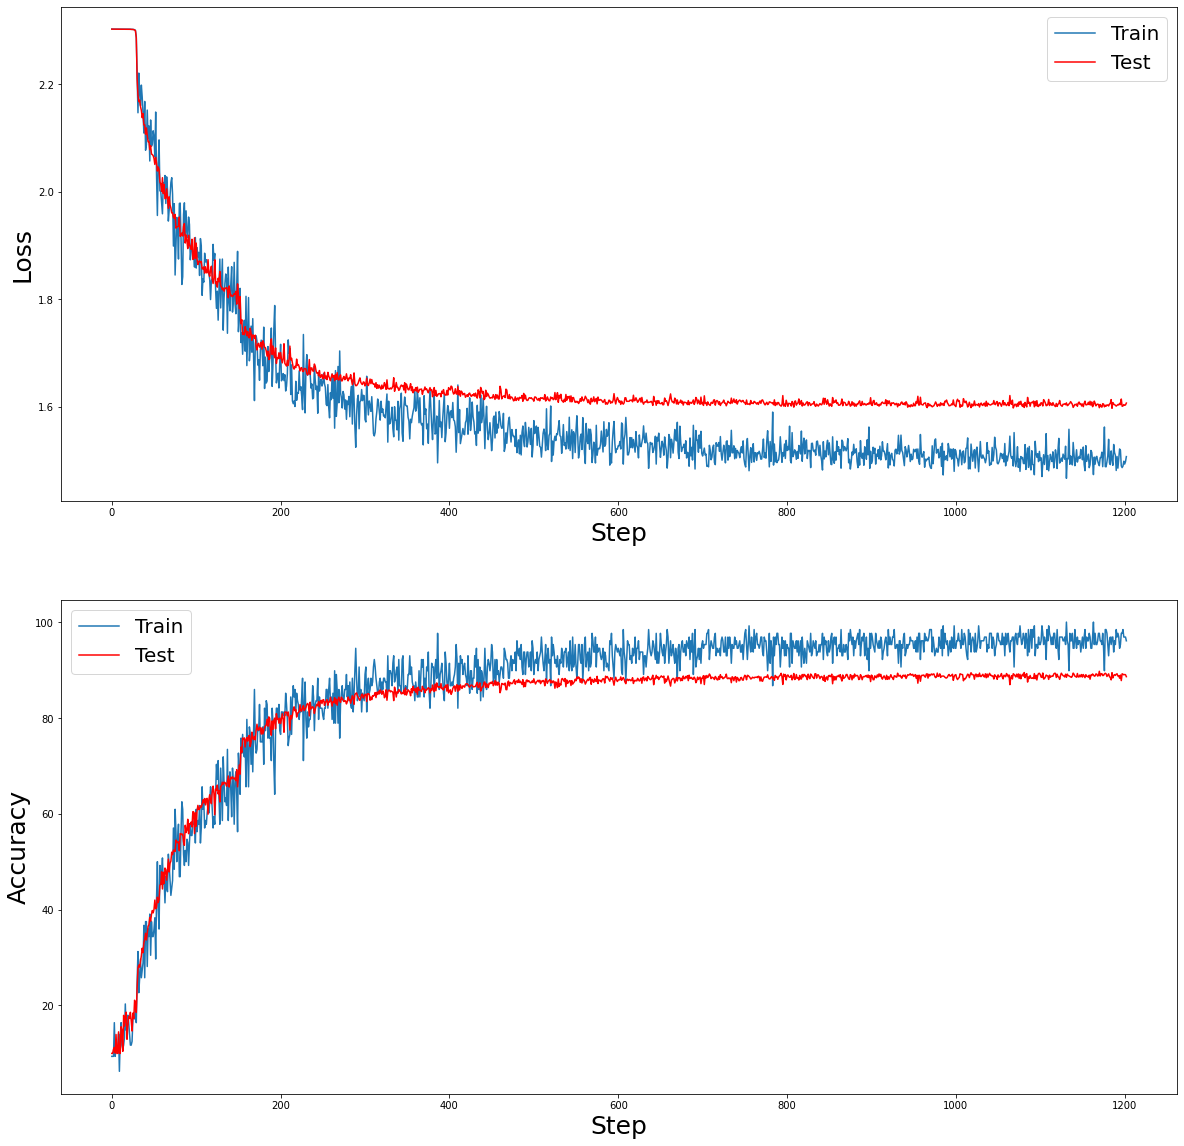

In [9]:
plt.figure(figsize=(20, 20))
plt.rcParams['axes.titlesize'] = 30
plt.axis('off')

label_fontsize = 25

plt.subplot(2, 1, 1)
train_lossline, = plt.plot(AlexNet.train_losses, label='Train')
test_lossline, = plt.plot(AlexNet.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.subplot(2, 1, 2)
train_accline, = plt.plot(AlexNet.train_acc, label='Train')
test_accline, = plt.plot(AlexNet.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)